<a href="https://colab.research.google.com/github/MinsooKwak/real_estate/blob/main/real_estate_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 한글 폰트 설정

In [ ]:
#!sudo apt-get install -y fonts-nanum  ## 폰트설치
#!sudo fc-cache -fv ## 폰트 업데이트
#!rm ~/.cache/matplotlib -rf ## 캐쉬된 matplotlib 폰트 삭제하여 재로딩

In [1]:
#import할 패키지 목록
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
import missingno as msno

# 경고를 무시합니다.
import warnings
warnings.filterwarnings("ignore")

# 구글 드라이브 호출
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# ttflist에 Nanum 글자 들어가는 폰트 있는지 확인하는 코드
f = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
f

#폰트종류설정
plt.rcParams["font.family"] ='NanumSquare'

# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.7.13
설정 폰트 글꼴: ['NanumSquare'], 설정 폰트 사이즈: 10.0


### Data import

In [3]:
cd /content/drive/MyDrive/real_estate

/content/drive/MyDrive/real_estate


In [4]:
ls

서울특별시_부동산_실거래가_정보_2006년1.csv
서울특별시_부동산_실거래가_정보_2007년.csv
서울특별시_부동산_실거래가_정보_2008년.csv
서울특별시_부동산_실거래가_정보_2009년.csv
서울특별시_부동산_실거래가_정보_2010년.csv
서울특별시_부동산_실거래가_정보_2011년.csv
서울특별시_부동산_실거래가_정보_2012년.csv
서울특별시_부동산_실거래가_정보_2013년.csv
서울특별시_부동산_실거래가_정보_2014년.csv
서울특별시_부동산_실거래가_정보_2015년.csv
서울특별시_부동산_실거래가_정보_2016년.csv
서울특별시_부동산_실거래가_정보_2017년.csv
서울특별시_부동산_실거래가_정보_2018년.csv
서울특별시_부동산_실거래가_정보_2019년.csv
서울특별시_부동산_실거래가_정보_2020년.csv
서울특별시_부동산_실거래가_정보_2021년.csv


In [5]:
df_2021 = pd.read_csv('서울특별시_부동산_실거래가_정보_2021년.csv',encoding='cp949')
df_2020 = pd.read_csv('서울특별시_부동산_실거래가_정보_2020년.csv',encoding='cp949')
df_2019 = pd.read_csv('서울특별시_부동산_실거래가_정보_2019년.csv',encoding='cp949')
df_2018 = pd.read_csv('서울특별시_부동산_실거래가_정보_2018년.csv',encoding='cp949')
df_2017 = pd.read_csv('서울특별시_부동산_실거래가_정보_2017년.csv',encoding='cp949')
df_2016 = pd.read_csv('서울특별시_부동산_실거래가_정보_2016년.csv',encoding='cp949')
df_2015 = pd.read_csv('서울특별시_부동산_실거래가_정보_2015년.csv',encoding='cp949')
df_2014 = pd.read_csv('서울특별시_부동산_실거래가_정보_2014년.csv',encoding='cp949')
df_2013 = pd.read_csv('서울특별시_부동산_실거래가_정보_2013년.csv',encoding='cp949')
df_2012 = pd.read_csv('서울특별시_부동산_실거래가_정보_2012년.csv',encoding='cp949')
df_2011 = pd.read_csv('서울특별시_부동산_실거래가_정보_2011년.csv',encoding='cp949')
df_2010 = pd.read_csv('서울특별시_부동산_실거래가_정보_2010년.csv',encoding='cp949')
df_2009 = pd.read_csv('서울특별시_부동산_실거래가_정보_2009년.csv',encoding='cp949')
df_2008 = pd.read_csv('서울특별시_부동산_실거래가_정보_2008년.csv',encoding='cp949')
df_2007 = pd.read_csv('서울특별시_부동산_실거래가_정보_2007년.csv',encoding='cp949')
df_2006 = pd.read_csv('서울특별시_부동산_실거래가_정보_2006년1.csv',encoding='cp949')

In [6]:
print(f'2021년 : {df_2021.shape}')
print(f'2020년 : {df_2020.shape}')
print(f'2019년 : {df_2019.shape}')
print(f'2018년 : {df_2018.shape}')
print(f'2017년 : {df_2017.shape}')
print(f'2016년 : {df_2016.shape}')
print(f'2015년 : {df_2015.shape}')
print(f'2014년 : {df_2014.shape}')
print(f'2013년 : {df_2013.shape}')
print(f'2012년 : {df_2012.shape}')
print(f'2011년 : {df_2011.shape}')
print(f'2010년 : {df_2010.shape}')
print(f'2009년 : {df_2009.shape}')
print(f'2008년 : {df_2008.shape}')
print(f'2007년 : {df_2007.shape}')
print(f'2006년 : {df_2006.shape}')

2021년 : (131871, 19)
2020년 : (176001, 19)
2019년 : (130272, 19)
2018년 : (165610, 19)
2017년 : (187753, 19)
2016년 : (209573, 19)
2015년 : (212543, 19)
2014년 : (142021, 19)
2013년 : (107282, 19)
2012년 : (81302, 19)
2011년 : (112409, 19)
2010년 : (92966, 19)
2009년 : (139667, 19)
2008년 : (146475, 19)
2007년 : (146970, 19)
2006년 : (210866, 19)


2019년도의 데이터셋에서 feature명을 다른 연도의 feature와 동일하게 변경해줍니다.

In [7]:
df_2019.columns = ['실거래가아이디','지번코드','시군구코드','자치구명','법정동코드','법정동명','신고년도','업무구분코드','업무구분','물건번호','대지권면적','건물면적','관리구분코드','층정보','건물주용도코드','건물주용도','물건금액','건축년도','건물명']

concat data

In [8]:
df = pd.concat([df_2021,df_2020,df_2019,df_2018,df_2017,df_2016,df_2015,df_2014,df_2013,df_2012,df_2011,df_2010,df_2009,df_2008,df_2007,df_2006])
df.shape

(2393581, 19)

### 결측치 비율 확인

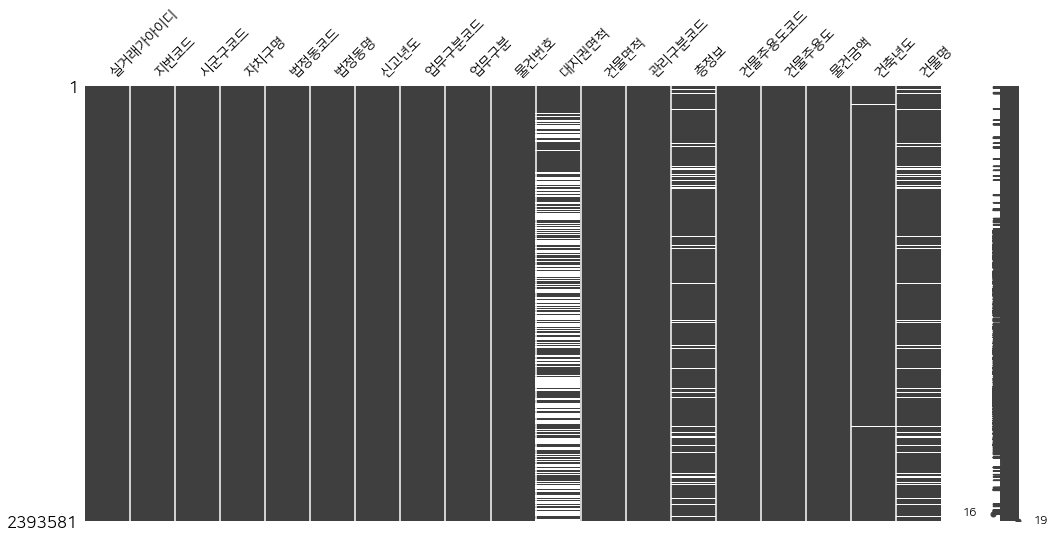

In [9]:
# 결측치 비율 확인
%matplotlib inline
msno.matrix(df, figsize=(17,8), fontsize=14);

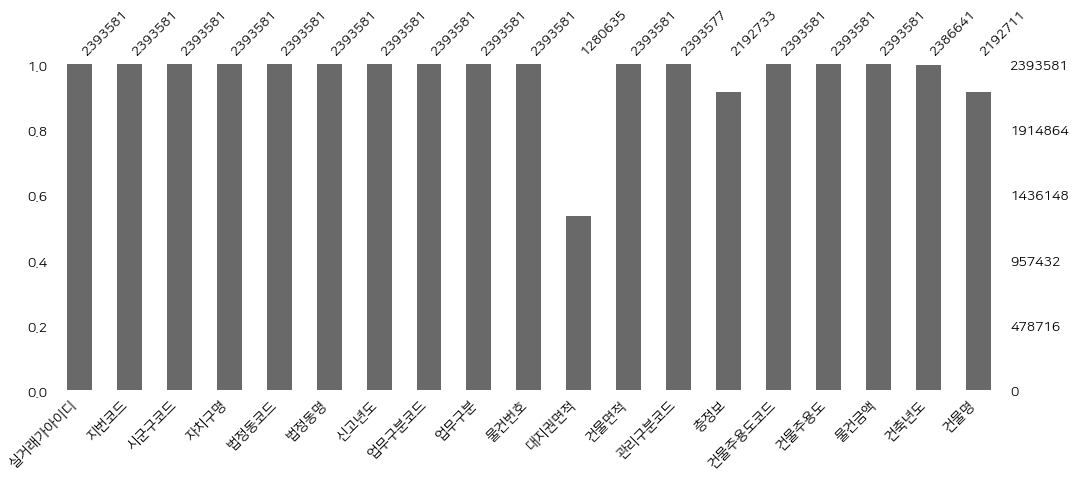

In [10]:
msno.bar(df, figsize=(17,6), fontsize=14);

In [17]:
print('결측치가 포함된 항목은 다음과 같습니다: \n')
for i in df.columns:
  null_rate = df[i].isna().sum() / len(df)*100
  if null_rate > 0:
    print(f"{i}'s null rate : {null_rate.round(2)}%")

결측치가 포함된 항목은 다음과 같습니다: 

대지권면적's null rate : 46.5%
관리구분코드's null rate : 0.0%
층정보's null rate : 8.39%
건축년도's null rate : 0.29%
건물명's null rate : 8.39%


참고: 대지권면적의 결측치 비율이 46.5%로 데이터의 절반 가량을 차지합니다.

각 Feature들의 범주 개수 확인

In [13]:
print(f'실거래가아이디 개수 : {df.실거래가아이디.nunique()}')
print(f'지번코드       개수 : {df.지번코드.nunique()}')
print(f'시군구코드     개수 : {df.시군구코드.nunique()}')
print(f'자치구명       개수 : {df.자치구명.nunique()}')
print(f'법정동코드     개수 : {df.법정동코드.nunique()}')
print(f'법정동명       개수 : {df.법정동명.nunique()}')
print(f'신고년도       개수 : {df.신고년도.nunique()}')
print(f'업무구분코드   개수 : {df.업무구분코드.nunique()}')
print(f'업무구분       개수 : {df.업무구분.nunique()}')
print(f'물건번호       개수 : {df.물건번호.nunique()}')
print(f'대지권면적     개수 : {df.대지권면적.nunique()}')
print(f'건물면적       개수 : {df.건물면적.nunique()}')
print(f'관리구분코드   개수 : {df.관리구분코드.nunique()}')
print(f'층정보         개수 : {df.층정보.nunique()}')
print(f'건물주용도코드 개수 : {df.건물주용도코드.nunique()}')
print(f'건물주용도     개수 : {df.건물주용도.nunique()}')
print(f'물건금액       개수 : {df.물건금액.nunique()}')
print(f'건축년도       개수 : {df.건축년도.nunique()}')
print(f'건물명         개수 : {df.건물명.nunique()}')

실거래가아이디 개수 : 2393581
지번코드       개수 : 162917
시군구코드     개수 : 25
자치구명       개수 : 25
법정동코드     개수 : 440
법정동명       개수 : 438
신고년도       개수 : 16
업무구분코드   개수 : 2
업무구분       개수 : 2
물건번호       개수 : 476
대지권면적     개수 : 15459
건물면적       개수 : 40490
관리구분코드   개수 : 8
층정보         개수 : 79
건물주용도코드 개수 : 4
건물주용도     개수 : 4
물건금액       개수 : 46270
건축년도       개수 : 117
건물명         개수 : 72049


In [20]:
df.head(2)

,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도,건물명
0,11110-2021-4-0005751-1,1111018300103450062,11110,종로구,1111018300,평창동,2021,4,신고,1,77.98,90.3,0,1.0,2002,연립주택,560000000,1994.0,(345-62)
1,11110-2021-4-0005458-1,1111017400107030000,11110,종로구,1111017400,창신동,2021,4,신고,1,0.00,54.7,0,6.0,2001,아파트,700000000,1993.0,창신쌍용2


실거래가아이디는 시군구코드-신고년도-업무구분코드-아이디-거래번호순으로 구성되어 있는 것으로 보입니다.

In [45]:
# 아이디를 도출하기 위한 함수를 정의합니다.
def split_dash(str):
  str = str.split('-',maxsplit=4)
  return str[3]

In [46]:
df.실거래가아이디 = df.실거래가아이디.astype(str)

In [47]:
df['아이디']= df['실거래가아이디'].apply(split_dash)
df.head(2)

,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도,건물명,아이디
0,11110-2021-4-0005751-1,1111018300103450062,11110,종로구,1111018300,평창동,2021,4,신고,1,77.98,90.3,0,1.0,2002,연립주택,560000000,1994.0,(345-62),0005751
1,11110-2021-4-0005458-1,1111017400107030000,11110,종로구,1111017400,창신동,2021,4,신고,1,0.00,54.7,0,6.0,2001,아파트,700000000,1993.0,창신쌍용2,0005458


In [48]:
print(f'거래한 아이디는 총 {df.아이디.nunique()}개 입니다.')

거래한 아이디는 총 64266개 입니다.


사용할 데이터프레임을 정리해줍니다.

In [49]:
df2 = df[['아이디','지번코드','시군구코드','자치구명','법정동코드','법정동명','신고년도','업무구분코드','업무구분','물건번호','대지권면적','건물면적','관리구분코드','층정보','건물주용도코드','건물주용도','물건금액','건축년도','건물명']]
df2.head(2)

,아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도,건물명
0,0005751,1111018300103450062,11110,종로구,1111018300,평창동,2021,4,신고,1,77.98,90.3,0,1.0,2002,연립주택,560000000,1994.0,(345-62)
1,0005458,1111017400107030000,11110,종로구,1111017400,창신동,2021,4,신고,1,0.00,54.7,0,6.0,2001,아파트,700000000,1993.0,창신쌍용2


In [57]:
trade_df = df2.아이디.value_counts().rename_axis('아이디').reset_index(name='거래량')
trade_df

,아이디,거래량
0,0007912,546
1,0007712,500
2,0007092,378
3,0005456,370
4,0001931,350
...,...,...
64261,0138828,1
64262,0138784,1
64263,0138781,1
64264,0138777,1


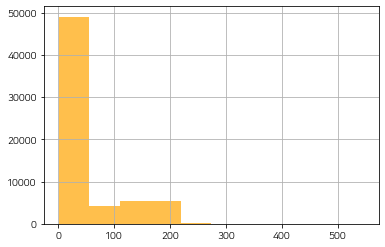

In [55]:
# 약 50개 기준으로 확인
df2.아이디.value_counts().hist(bins=10,facecolor='orange', alpha=0.7)

대부분 200 이하의 거래량을 보이며, 50이하의 거래량이 압도적으로 많다.

- 확인할 수 있는 것:

  - 거래량에 따른 물건금액, 건물주용도,자치구명
  
    - 1~50
    - 51~100
    - 101~150
    - 151~200
    - 200 초과

**거래량 feature 추가**

아이디에 따라 거래량 데이터를 추가하기 위해 merge함수를 사용해준다.

공통된 column인 아이디를 사용한다.

In [61]:
df2=pd.merge(df2,trade_df,on='아이디')
df2.head(3)

,아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도,건물명,거래량
0,0005751,1111018300103450062,11110,종로구,1111018300,평창동,2021,4,신고,1,77.98,90.30,0,1.0,2002,연립주택,560000000,1994.0,(345-62),183
1,0005751,1123010300108920121,11230,동대문구,1123010300,제기동,2021,4,신고,1,17.93,29.76,0,2.0,2002,연립주택,270000000,2018.0,다빈치빌,183
2,0005751,1130510200101480203,11305,강북구,1130510200,번동,2021,4,신고,1,24.20,35.02,0,-1.0,2002,연립주택,165000000,1989.0,승한빌라,183


In [62]:
df2.거래량.nunique()

265

추후 거래량과 물건금액의 상관성도 파악해볼 수 있을 것이다.

**데이터셋 구분**

- 수치형 : 대지권면적, 건물면적, 층정보, 물건금액, 건축년도,거래량
- 범주형
  - 높은 범주: 지번코드, 법정동코드, 법정동명, 물건번호, 건물명, 아이디
  - 낮은 범주: 시군구코드, 자치구명, 신고년도, 업무구분코드, 업무구분, 관리구분코드, 건물주용도코드, 건물주용도